In [1]:
import timm

In [2]:
timm.list_models()

['adv_inception_v3',
 'bat_resnext26ts',
 'beit_base_patch16_224',
 'beit_base_patch16_224_in22k',
 'beit_base_patch16_384',
 'beit_large_patch16_224',
 'beit_large_patch16_224_in22k',
 'beit_large_patch16_384',
 'beit_large_patch16_512',
 'beitv2_base_patch16_224',
 'beitv2_base_patch16_224_in22k',
 'beitv2_large_patch16_224',
 'beitv2_large_patch16_224_in22k',
 'botnet26t_256',
 'botnet50ts_256',
 'cait_m36_384',
 'cait_m48_448',
 'cait_s24_224',
 'cait_s24_384',
 'cait_s36_384',
 'cait_xs24_384',
 'cait_xxs24_224',
 'cait_xxs24_384',
 'cait_xxs36_224',
 'cait_xxs36_384',
 'coat_lite_mini',
 'coat_lite_small',
 'coat_lite_tiny',
 'coat_mini',
 'coat_tiny',
 'coatnet_0_224',
 'coatnet_0_rw_224',
 'coatnet_1_224',
 'coatnet_1_rw_224',
 'coatnet_2_224',
 'coatnet_2_rw_224',
 'coatnet_3_224',
 'coatnet_3_rw_224',
 'coatnet_4_224',
 'coatnet_5_224',
 'coatnet_bn_0_rw_224',
 'coatnet_nano_cc_224',
 'coatnet_nano_rw_224',
 'coatnet_pico_rw_224',
 'coatnet_rmlp_0_rw_224',
 'coatnet_rmlp_1_rw

In [1]:
import os
import sys
import numpy as np
import h5py
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from sklearn.decomposition import PCA
import seaborn as sns
import datetime
from scipy.stats import sem
import matplotlib.cm as cm
import pathlib
import traceback
import gc
from data.ValidationDataset import NoisyDataset

# Load PCA

In [4]:
netname = 'pnet'
engram_dir = '/mnt/smb/locker/abbott-locker/hcnn/'
activations_dir = f'{engram_dir}3_activations/{netname}/'
pca_activations_dir = f'{engram_dir}4_activations_pca/{netname}/'
pickles_dir = f'{engram_dir}pickles/'
bg_types = ['pinkNoise', 'AudScene', 'Babble8Spkr']
snr_types = [-9.0, -6.0, -3.0, 0.0, 3.0]

# Measure invariance

In [5]:
with open(f'{pickles_dir}{netname}_invariance.p', 'rb') as f:
    df = pickle.load(f)

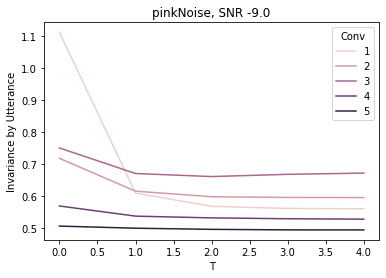

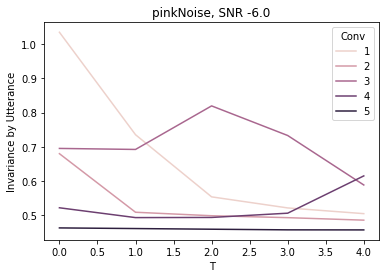

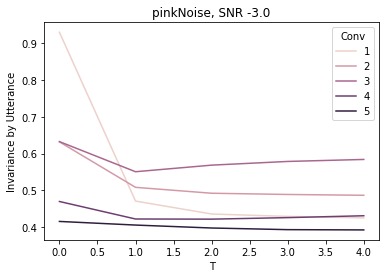

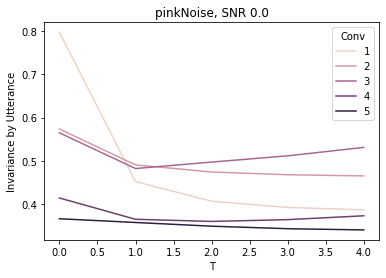

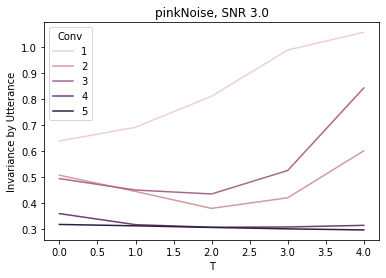

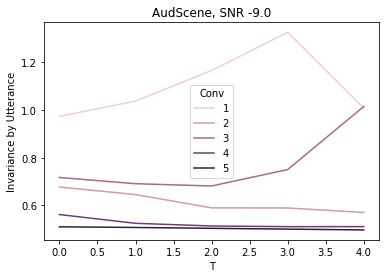

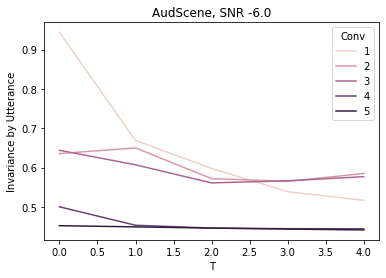

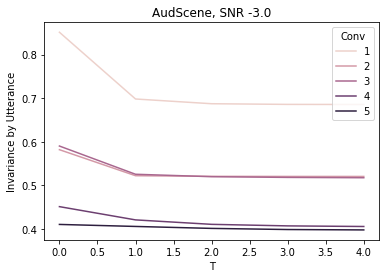

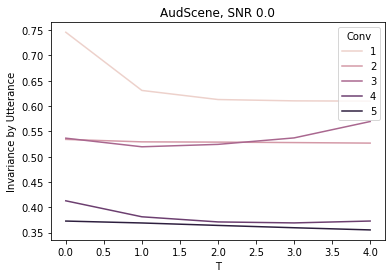

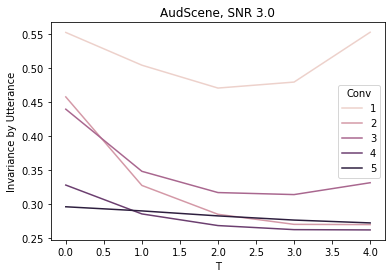

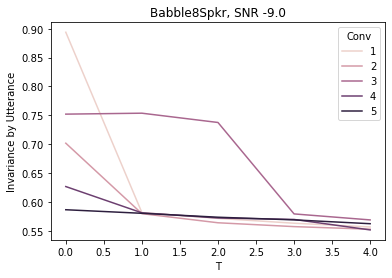

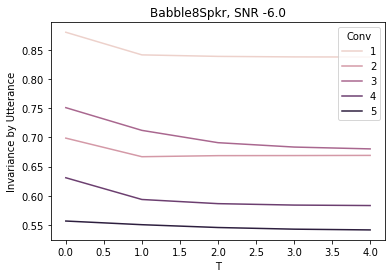

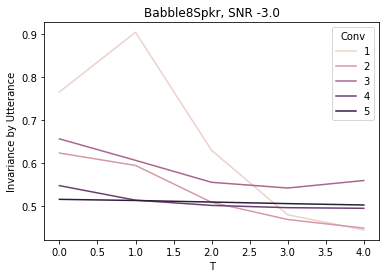

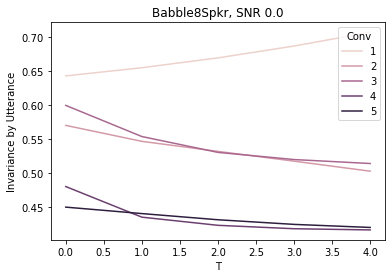

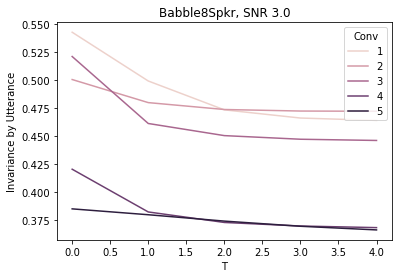

In [6]:
for bg in bg_types:
    for snr in snr_types:
        fig, ax = plt.subplots()
        sns.lineplot(
            x='T', y='Invariance by Utterance', hue='Conv',
            data=df[(df['BG']==bg) & (df['SNR']==snr)],
            ax=ax)
        ax.set_title(f'{bg}, SNR {snr}')

In [10]:
df

,BG,SNR,Conv,T,Dist,Invariance by Utterance,Invariance by Radius
0,pinkNoise,-9.0,1,0,7.088675e+08,1.112929,1.079414
1,pinkNoise,-9.0,1,1,1.472792e+09,0.608409,0.597652
2,pinkNoise,-9.0,1,2,1.513000e+09,0.567099,0.556193
3,pinkNoise,-9.0,1,3,1.489964e+09,0.560440,0.550834
4,pinkNoise,-9.0,1,4,1.470541e+09,0.559300,0.553014
...,...,...,...,...,...,...,...
370,Babble8Spkr,3.0,5,0,1.051520e+05,0.385187,0.386440
371,Babble8Spkr,3.0,5,1,1.043279e+05,0.379958,0.382551
372,Babble8Spkr,3.0,5,2,1.020562e+05,0.374279,0.374572
373,Babble8Spkr,3.0,5,3,9.935277e+04,0.369682,0.371869


In [13]:
bgs = np.array(df['BG'])
snrs = np.array(df['SNR'])
convs = np.array(df['Conv'])
ts = np.array(df['T'])
dists = np.array(df['Dist'])
inv_utts = np.array(df['Invariance by Utterance'])
delta_invariance = []

for i in range(len(bgs)):
    bg = bgs[i]; snr = snrs[i];
    conv = convs[i]; t = ts[i];
    dist = dists[i]; inv_utt = inv_utts[i];
    idxs = np.logical_and(bgs == bg, snrs == snr)
    idxs = np.logical_and(idxs, convs == conv)
    idxs = np.logical_and(idxs, ts == 0)
    delta_invariance.append(
        inv_utt - np.mean(inv_utterance[idxs])
        )

In [14]:
df = pd.DataFrame({
    'BG': bgs,
    'SNR': snrs,
    'Conv': convs,
    'T': ts,
    '$\Delta$ Invariance': delta_invariance,
    'Invariance': inv_utts,
})

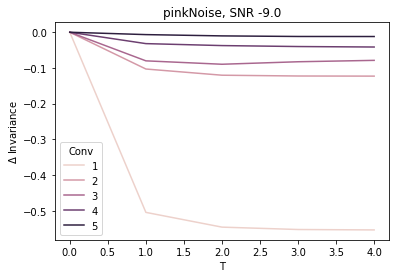

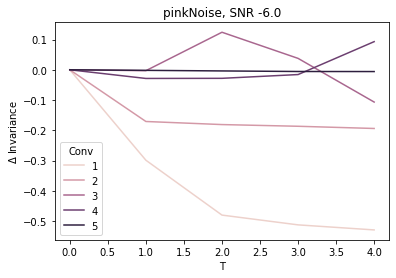

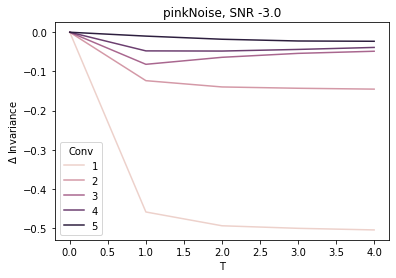

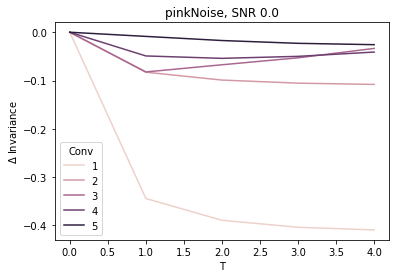

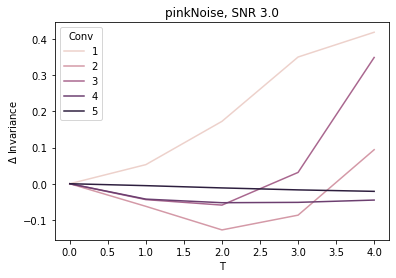

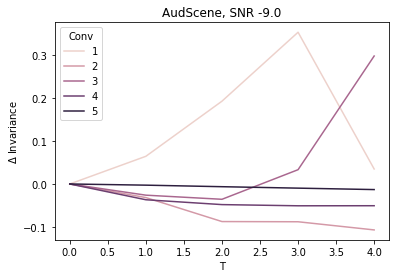

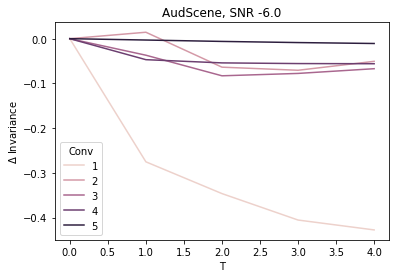

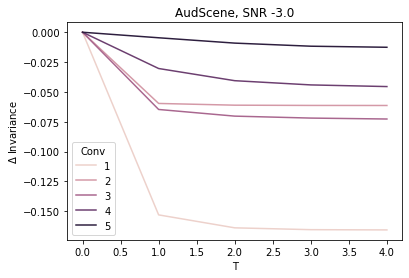

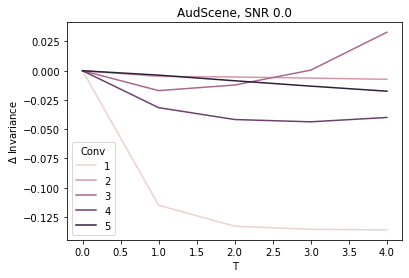

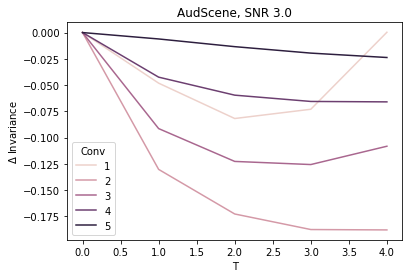

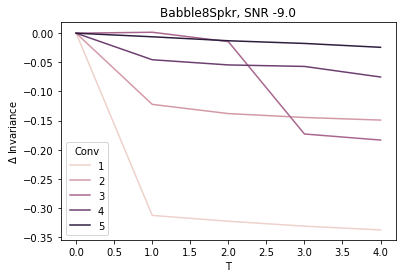

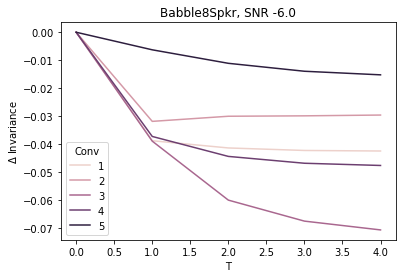

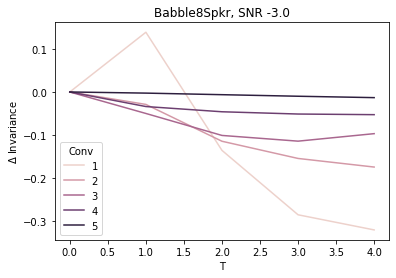

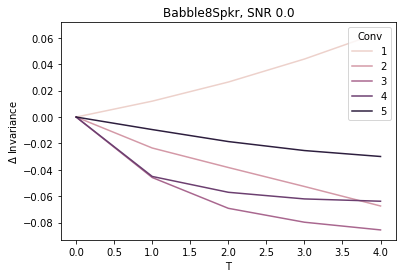

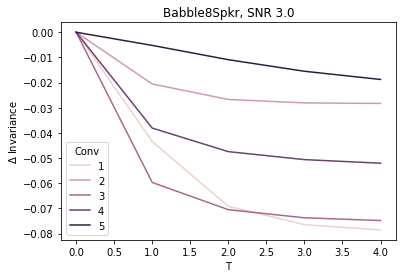

In [17]:
for bg in bg_types:
    for snr in snr_types:
        fig, ax = plt.subplots()
        sns.lineplot(
            x='T', y='$\Delta$ Invariance', hue='Conv',
            data=df[(df['BG']==bg) & (df['SNR']==snr)],
            ax=ax)
        ax.set_title(f'{bg}, SNR {snr}')

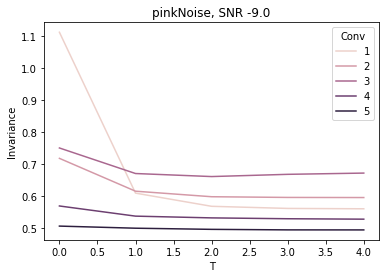

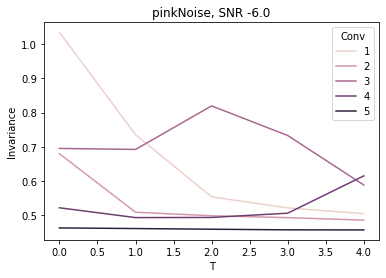

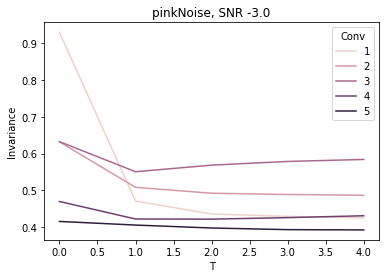

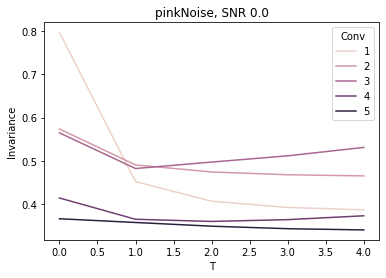

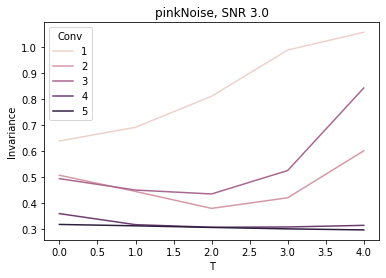

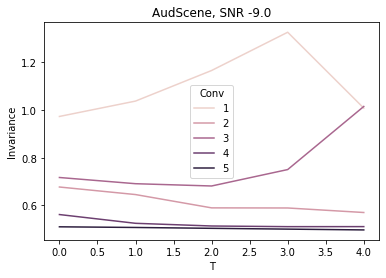

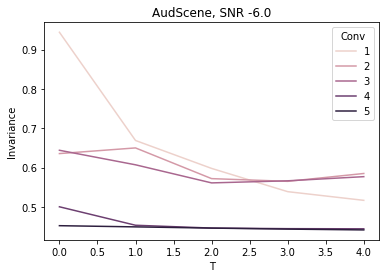

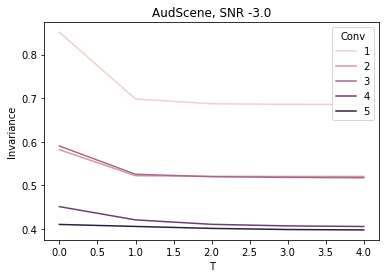

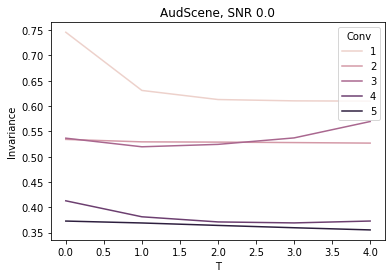

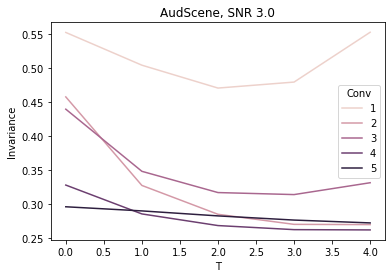

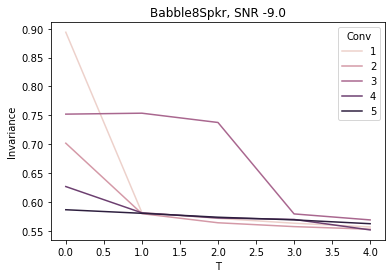

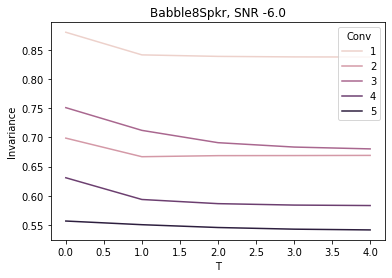

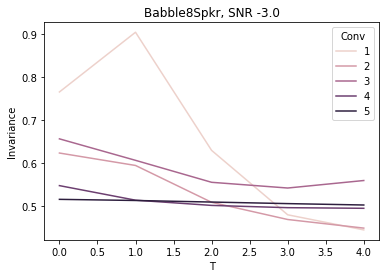

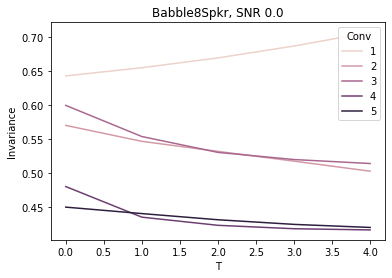

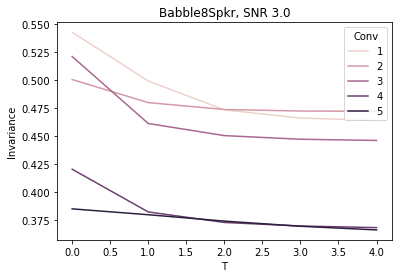

In [16]:
for bg in bg_types:
    for snr in snr_types:
        fig, ax = plt.subplots()
        sns.lineplot(
            x='T', y='Invariance', hue='Conv',
            data=df[(df['BG']==bg) & (df['SNR']==snr)],
            ax=ax)
        ax.set_title(f'{bg}, SNR {snr}')

Text(0.5, 1.0, 'All Sounds')

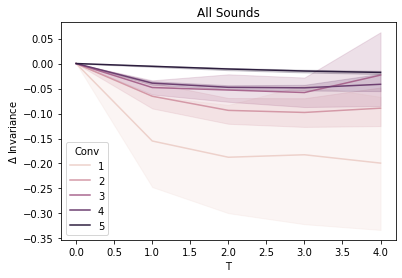

In [19]:
fig, ax = plt.subplots()
sns.lineplot(
    x='T', y='$\Delta$ Invariance', hue='Conv',
    data=df,
    ax=ax)
ax.set_title(f'All Sounds')

In [22]:
import configs

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


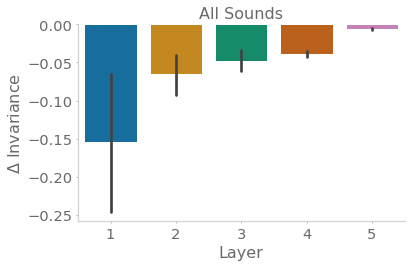

In [23]:
fig, ax = plt.subplots()
sns.barplot(
    x='Conv', y='$\Delta$ Invariance',
    data=df[df['T']==1],
    ax=ax)
ax.set_xlabel('Layer')
ax.set_title('All Sounds')
plt.tight_layout()
plt.savefig('invariance.png', dpi=300)

Text(0.5, 1.0, 'All Sounds')

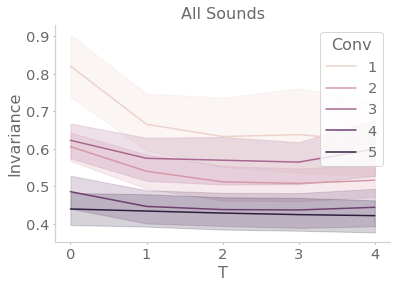

In [25]:
fig, ax = plt.subplots()
sns.lineplot(
    x='T', y='Invariance', hue='Conv',
    data=df,
    ax=ax)
ax.set_title(f'All Sounds')